# Перетворення випадкових величин

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm, geom, expon

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

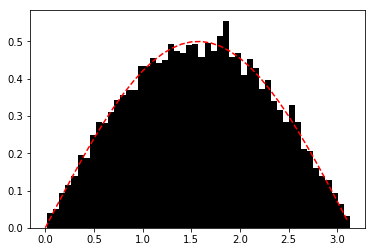

In [16]:
a = 1/2  #sin - парная

def f_1(x):
    return a*np.sin(x)

def inv_f_1(x):
    return np.arccos(1 - 2*x)

xi = inv_f_1(uniform.rvs(size = 10 ** 4))

plt.hist(xi, density = True, bins = 50, color = 'black')
plt.plot(np.arange(0, np.pi, 0.1), func_1(x), 'r--')
plt.show()



### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

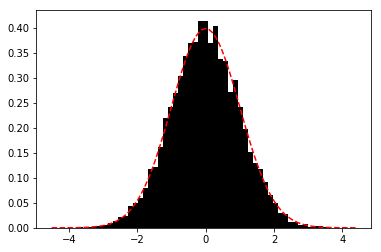

In [32]:
xi = norm.ppf(uniform.rvs(size = 10 ** 4))

plt.hist(xi, density = True, bins = 50, color = 'black')
plt.plot(np.arange(-4.5, 4.5, 0.1), norm.pdf(np.arange(-4.5, 4.5, 0.1)), 'r--')
plt.show()

## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

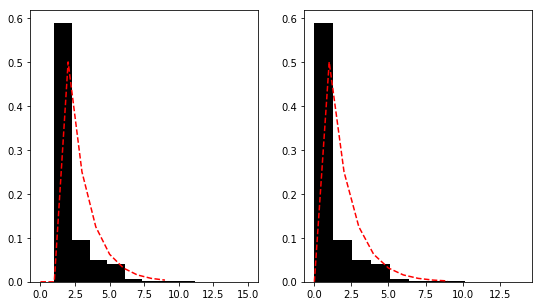

In [25]:
xi = geom(p = 0.5).rvs(size = 10 ** 4)
eta = xi - 1
plt.figure(figsize = (9, 5))
plt.subplot(121)
plt.hist(xi, density = True, bins = 11, rwidth = 1.1, color = 'black')
plt.plot(np.arange(0, 10), geom(p = 0.5, loc = 1).pmf(np.arange(0, 10)), 'r--')
plt.subplot(122)
plt.hist(eta, density = True, bins = 11, rwidth = 1.1, color = 'black')
plt.plot(np.arange(0, 10), geom(p = 0.5).pmf(np.arange(0, 10)), 'r--')
plt.show()



## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

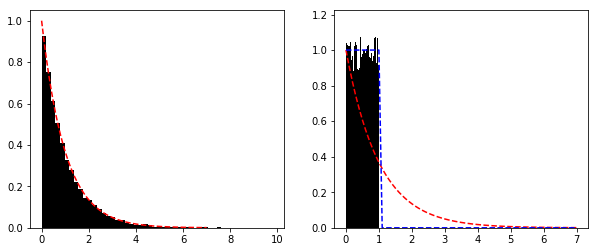

In [31]:
xi = expon.rvs(size = 10 ** 4)

plt.figure(figsize = (10,4))
plt.subplot(121)
plt.hist(xi, density = True, bins = 50, color = 'black')
plt.plot(np.arange(0, 7.1, 0.1), expon.pdf(np.arange(0, 7.1, 0.1)), 'r--')

plt.subplot(122)
plt.hist(expon.pdf(xi), density = True, bins = 50, color = 'black')
plt.plot(np.arange(0, 7.1, 0.1), expon.pdf(np.arange(0, 7.1, 0.1)), 'r--')
plt.plot(np.arange(0, 7.1, 0.1), uniform.pdf(np.arange(0, 7.1, 0.1)), 'b--')

plt.show()



### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


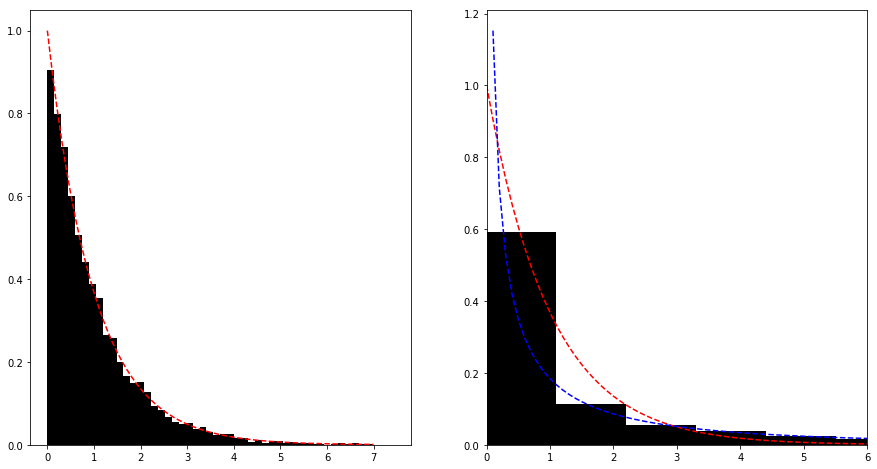

In [36]:
xi = expon.rvs(size = 10 ** 4)

def g(y):
    return np.exp(-np.sqrt(y))/(2*np.sqrt(y))

plt.figure(figsize = (15, 8))
plt.subplot(121)
plt.hist(xi, density = True, bins = 50, color = 'black')
plt.plot(np.arange(0, 7.1, 0.1), expon.pdf(np.arange(0, 7.1, 0.1)), 'r--')

plt.subplot(122)
plt.xlim((0, 6))
plt.hist(xi**2, density = True, bins= 50, color = 'black')
plt.plot(np.arange(0, 7.1, 0.1), expon.pdf(np.arange(0, 7.1, 0.1)), 'r--')
plt.plot(np.arange(0, 7.1, 0.1), g(np.arange(0, 7.1, 0.1)), 'b--')


plt.show()



## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

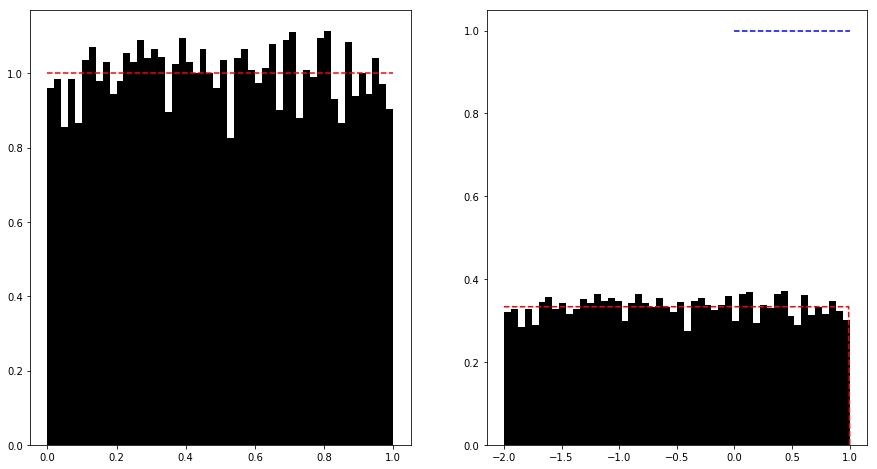

In [42]:
xi = uniform.rvs(size = 10 ** 4)
eta = 3*xi - 2

plt.figure(figsize = (15, 8))
plt.subplot(121)
plt.hist(xi, density = True, bins = 50, color = 'black')
plt.plot(np.arange(0, 1.1, 0.1), uniform.pdf(np.arange(0, 1.1, 0.1)), 'r--')
plt.subplot(122)
plt.hist(eta, density = True, bins = 50, color = 'black')
plt.plot(np.arange(0, 1.1, 0.1), uniform.pdf(np.arange(0, 1.1, 0.1)), 'b--')
plt.plot(np.arange(-2, 1.001, 0.01), uniform(loc = -2, scale = 3).pdf(np.arange(-2, 1.001, 0.01)), 'r--')

plt.show()


### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

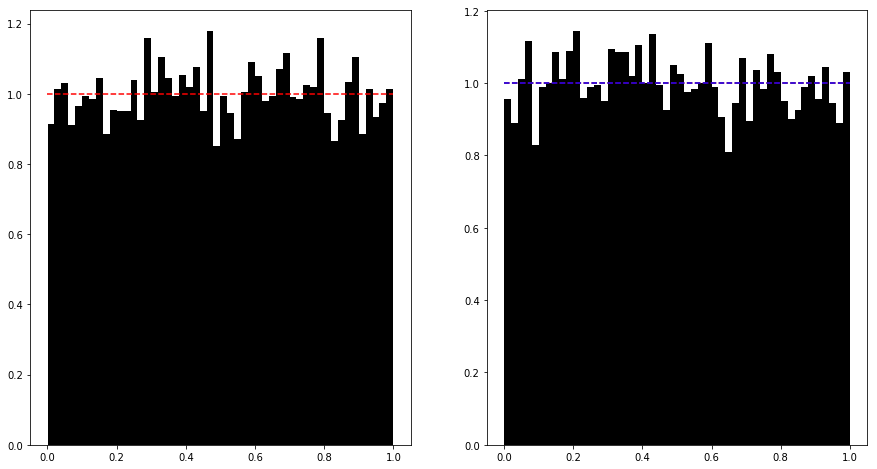

In [44]:
xi = uniform.rvs(size = 10 ** 4)
eta = 2*xi - 1

plt.figure(figsize = (15, 8))
plt.subplot(121)
plt.hist(xi, density = True, bins = 50, color = 'black')
plt.plot(np.arange(0, 1.1, 0.1), uniform.pdf(np.arange(0, 1.1, 0.1)), 'r--')
plt.subplot(122)
plt.hist(np.abs(eta), density = True, bins = 50, color = 'black')
plt.plot(np.arange(0, 1.1, 0.1), uniform.pdf(np.arange(0, 1.1, 0.1)), 'r--')
plt.plot(np.arange(0, 1.1, 0.1), uniform.pdf(np.arange(0, 1.1, 0.1)), 'b--')

plt.show()


### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

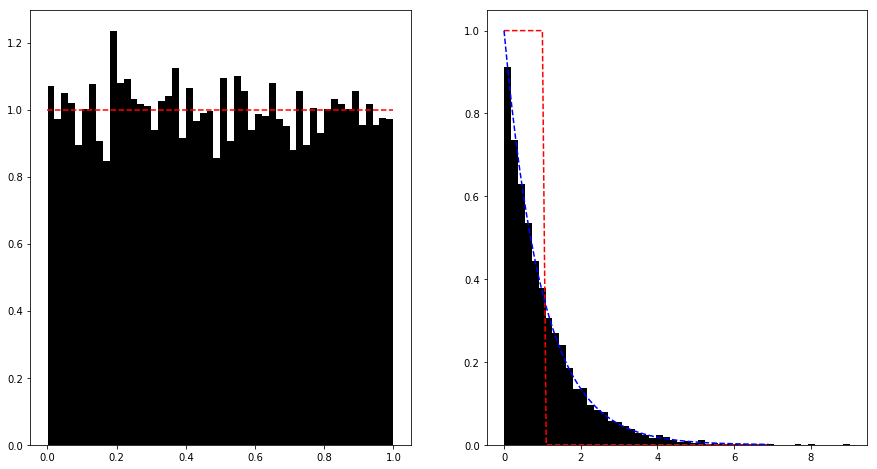

In [47]:
xi = uniform.rvs(size = 10 ** 4)

plt.figure(figsize = (15, 8))
plt.subplot(121)
plt.hist(xi, density = True, bins = 50, color = 'black')
plt.plot(np.arange(0, 1.1, 0.1), uniform.pdf(np.arange(0, 1.1, 0.1)), 'r--')
plt.subplot(122)
plt.hist(-np.log(xi), density = True, bins = 50, color = 'black')
plt.plot(np.arange(0, 7, 0.1), uniform.pdf(np.arange(0, 7, 0.1)), 'r--')
plt.plot(np.arange(0, 7, 0.1), expon.pdf(np.arange(0, 7, 0.1)), 'b--')


plt.show()


## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [58]:
xi = (uniform(0, 1), uniform(0, 1))


Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

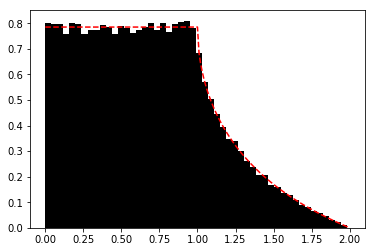

In [59]:
q = xi[0].rvs(100000) ** 2 + xi[1].rvs(100_000) ** 2

def eta(x: float):
    result = np.pi / 4 if 0 <= x <= 1 else 0
    result += (np.pi/4 - np.arccos(1 / np.sqrt(x)) + 1 / (2 * np.sqrt(x - 1))) if 1 < x <= 2 else 0
    result -= 1 / (2 * np.sqrt(x - 1)) if 1 < x <= 2 else 0
    return result

plt.hist(q, bins = 50, density = True, rwidth = 1.1, color = 'black')
plt.plot(np.arange(0, 2.01, 0.01), list(map(eta, np.arange(0, 2.01, 0.01))), 'r--')
plt.show()



Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

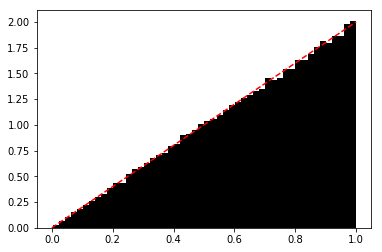

In [60]:
q = np.array([max(a, b) for a, b in zip(xi[0].rvs(10 ** 4), xi[1].rvs(10 ** 4))])

plt.hist(q, bins = 50, density = True, rwidth = 1.1, color = 'black')
plt.plot(np.arange(0, 1.01, 0.01), 2*np.arange(0, 1.01, 0.01), 'r--')
plt.show()



Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

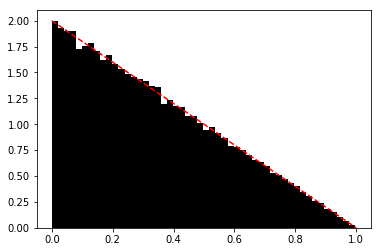

In [61]:
q = np.array([abs(a - b) for a, b in zip(xi[0].rvs(100000), xi[1].rvs(100000))])

plt.hist(q, bins = 50, density = True, rwidth = 1.1, color = 'black')
plt.plot(np.arange(0, 1.01, 0.01), 2 - 2*np.arange(0, 1.01, 0.01), 'r--')
plt.show()